In [27]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm import tqdm_notebook as tq

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from collections import Counter, OrderedDict

In [28]:
# Import data for probabilities
probability_table = pd.read_csv('driver_attention.csv')
driver_impairment_table = pd.read_csv('driver_impairment.csv')

In [29]:
# View data
display(probability_table.tail())

,Impairments,None,Distracted,"Drowsy, sleepy, asleep, fatigued",Exceeded speed limit,Exceeded safe speed but not speed limit,Driving slowly: below speed limit,Driving slowly in relation to other traffic: not below speed limit,Passing on right,Illegal passing,...,Avoiding other vehicle,Avoiding animal,Apparent unfamiliarity with roadway,Apparent unfamiliarity with vehicle,Apparent general inexperience driving,Use of cruise control contributed to late braking,Other,Unknown,NULL (no value),Total
10,Deaf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Other,51,26,2,7,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,107
12,Unknown,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
13,NULL (no value),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Total,32966,1893,594,1135,363,171,155,78,59,...,88,7,76,4,13,0,109,9,0,40859


## Simulate all behaviors and impairments 
### Experiment 1

In [30]:
# Find total Crashes
TOTAL_CRASHES = probability_table[:-1]['Total'].sum()
print(TOTAL_CRASHES)

40859


In [31]:
IMPAIRMENTS = probability_table['Impairments']
IMPAIRMENTS

0                        None apparent
1     Drowsy, sleepy, asleep, fatigued
2                        Ill, blackout
3                                Angry
4                Other emotional state
5                    Drugs, medication
6                       Drugs, alcohol
7                  Other illicit drugs
8             Restricted to wheelchair
9      Impaired due to previous injury
10                                Deaf
11                               Other
12                             Unknown
13                     NULL (no value)
14                               Total
Name: Impairments, dtype: object

In [32]:
BEHAVIOR_PROB_DICT = {}
for col in probability_table:
    if (col == 'Impairments') | (col == 'NULL (no value)') | (col == 'Total'):
        next
    else:
        BEHAVIOR_PROB_DICT[col] = (probability_table[col].iloc[14] / TOTAL_CRASHES)

In [33]:
# Assign each driver a random behavior
driver_behavior = []
items = list(BEHAVIOR_PROB_DICT.items())  # List of tuples of (key,values)


 

for i in tq(range(100000)):
    assigned_behavior = 0
    np.random.shuffle(items)
    while assigned_behavior == 0:
        for key, value in items:
        #     print(key, ":", value)
            behavior = np.random.binomial(1, value)
            if behavior == 1:
                driver_behavior.append(key)
                assigned_behavior = 1
                break

In [34]:
len(driver_behavior)

100000

## Assign Impairment based on Behavior

In [35]:
display(driver_impairment_table.tail())

,Impairments,None,Distracted,"Drowsy, sleepy, asleep, fatigued",Exceeded speed limit,Exceeded safe speed but not speed limit,Driving slowly: below speed limit,Driving slowly in relation to other traffic: not below speed limit,Passing on right,Illegal passing,...,Driving without lights or with insufficient lights,Avoiding pedestrian,Avoiding other vehicle,Avoiding animal,Apparent unfamiliarity with roadway,Apparent unfamiliarity with vehicle,Apparent general inexperience driving,Use of cruise control contributed to late braking,Other,Unknown
8,Restricted to wheelchair,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,...,0.000,0,0,0,0.000000,0,0,0,0.0,0.000000
9,Impaired due to previous injury,0.000576,0.001057,0.000000,0.002643,0.000000,0.000000,0.0,0.0,0,...,0.125,0,0,0,0.000000,0,0,0,0.0,0.000000
10,Deaf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,...,0.000,0,0,0,0.000000,0,0,0,0.0,0.000000
11,Other,0.001547,0.013735,0.003367,0.006167,0.005510,0.005848,0.0,0.0,0,...,0.000,0,0,0,0.013158,0,0,0,0.0,0.111111
12,Unknown,0.000121,0.000000,0.000000,0.000000,0.002755,0.000000,0.0,0.0,0,...,0.000,0,0,0,0.000000,0,0,0,0.0,0.000000


In [36]:
driver_impairment = []

for driver in tq(driver_behavior):
#     print(driver)
#     print(np.array(driver_impairment_table[driver]))
    probs = np.array(driver_impairment_table[driver])
    impairment_dict = {}
    for c, prob in enumerate(probs):
        impairment_dict[driver_impairment_table['Impairments'].iloc[c]] = prob
#     print(impairment_dict)
    
    
    assigned_impairment = 0
    items = list(impairment_dict.items())
    np.random.shuffle(items)
    while assigned_impairment == 0:
        for key, value in items:
        #     print(key, ":", value)
            impairment = np.random.binomial(1, value)
            if impairment == 1:
                driver_impairment.append(key)
                assigned_impairment = 1
                break


In [39]:
behavior_1 = Counter(driver_behavior)
sorted_1 = {k: v for k, v in sorted(behavior_1.items(), key=lambda item: item[1], reverse=True)}


impairment_1 = Counter(driver_impairment)
sorted_im_1 = {k: v for k, v in sorted(impairment_1.items(), key=lambda item: item[1], reverse=True)}

print(sorted_1)
print(sorted_im_1)

{'None': 87098, 'Distracted': 3199, 'Exceeded speed limit': 1851, 'Failed to signal': 1362, 'Drowsy, sleepy, asleep, fatigued': 974, 'Stop sign violation, "rolling stop"': 653, 'Exceeded safe speed but not speed limit': 573, 'Improper turn, cut corner on right': 557, 'Following too closely': 282, 'Driving slowly: below speed limit': 272, 'Driving slowly in relation to other traffic: not below speed limit': 264, 'Improper turn, cut corner on left': 264, 'Right-of-way error in relation to other vehicle or person, apparent recognition failure': 229, 'Improper backing, did not see': 176, 'Signal violation, tried to beat signal change': 169, 'Did not see other vehicle during lane change or merge': 166, 'Other': 156, 'Passing on right': 147, 'Avoiding other vehicle': 141, 'Apparent unfamiliarity with roadway': 118, 'Wrong side of road, not overtaking': 111, 'Improper turn, wide left turn': 106, 'Cutting in, too close behind other vehicle': 100, 'Improper turn, wide right turn': 96, 'Signal v

In [38]:
len(driver_impairment)

100000

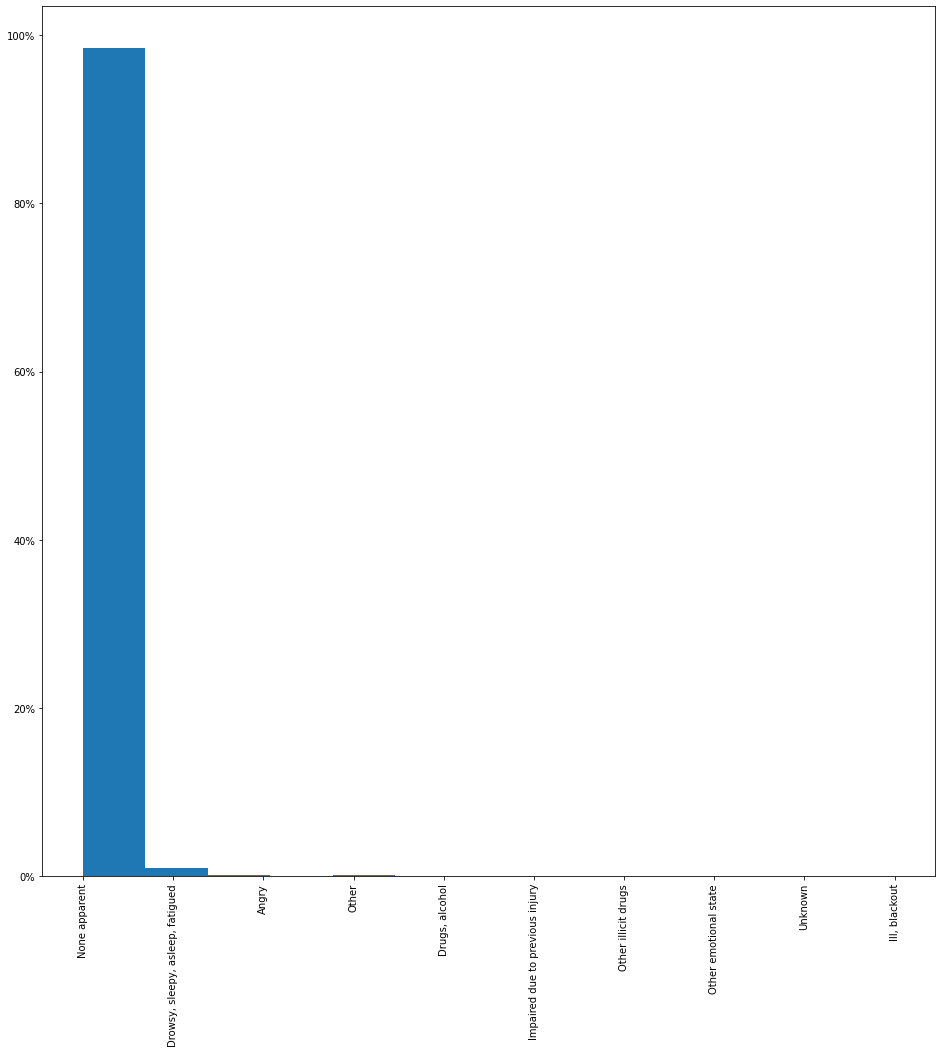

In [14]:
fig, ax = plt.subplots(figsize=[16,16])
ax.hist(driver_impairment, bins=len(impairment_dict))
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(driver_impairment)))

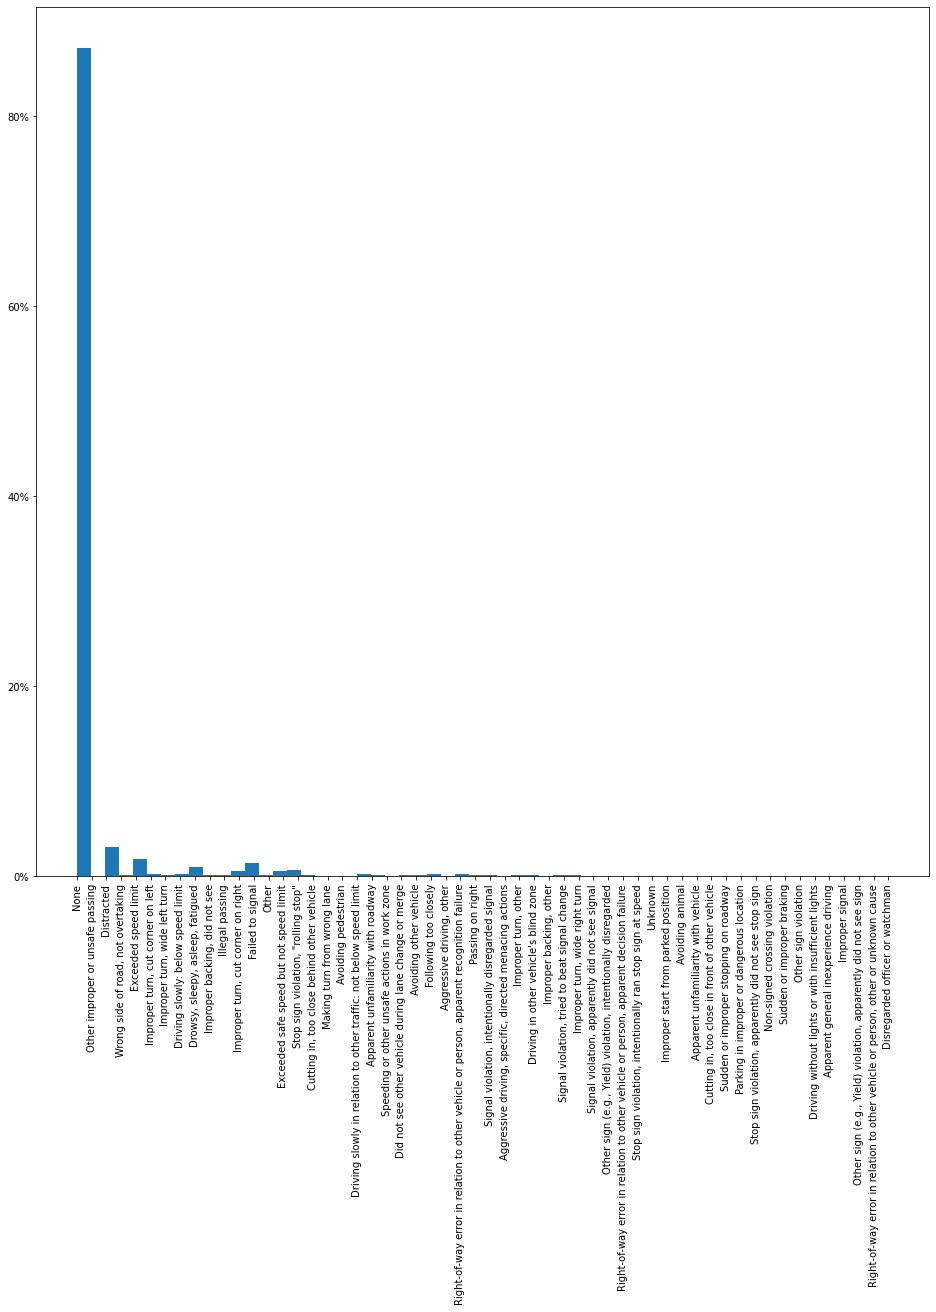

In [18]:
fig, ax = plt.subplots(figsize=[16,16])
ax.hist(driver_behavior, bins=len(BEHAVIOR_PROB_DICT))
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(driver_behavior)))

In [16]:
# Based on driver behavior select driver impairment

## Remove None Behavior 
### Experiment 2

In [36]:
# Find total Crashes
TOTAL_CRASHES = probability_table[:-1]['Total'].sum() - probability_table.iloc[14][1]
# print(probability_table.iloc[14][1])
print(TOTAL_CRASHES)

7893


In [37]:
IMPAIRMENTS = probability_table['Impairments']
IMPAIRMENTS

0                        None apparent
1     Drowsy, sleepy, asleep, fatigued
2                        Ill, blackout
3                                Angry
4                Other emotional state
5                    Drugs, medication
6                       Drugs, alcohol
7                  Other illicit drugs
8             Restricted to wheelchair
9      Impaired due to previous injury
10                                Deaf
11                               Other
12                             Unknown
13                     NULL (no value)
14                               Total
Name: Impairments, dtype: object

In [38]:
BEHAVIOR_PROB_DICT = {}
for col in probability_table:
    if (col == 'Impairments') | (col == 'NULL (no value)') | (col == 'Total') |(col=='None'):
        next
    else:
        BEHAVIOR_PROB_DICT[col] = (probability_table[col].iloc[14] / TOTAL_CRASHES)

print(BEHAVIOR_PROB_DICT)

{'Distracted': 0.23983276320790575, 'Drowsy, sleepy, asleep, fatigued': 0.07525655644241733, 'Exceeded speed limit': 0.14379830229317117, 'Exceeded safe speed but not speed limit': 0.0459901178259217, 'Driving slowly: below speed limit': 0.021664766248574687, 'Driving slowly in relation to other traffic: not below speed limit': 0.019637653617129103, 'Passing on right': 0.009882174078297225, 'Illegal passing': 0.007474977828455594, 'Other improper or unsafe passing': 0.006208032433802103, 'Cutting in, too close in front of other vehicle': 0.003040668947168377, 'Cutting in, too close behind other vehicle': 0.008488534144178385, 'Making turn from wrong lane': 0.0008868617762574433, 'Did not see other vehicle during lane change or merge': 0.012669453946534905, "Driving in other vehicle's blind zone": 0.0063347269732674525, 'Aggressive driving, specific, directed menacing actions': 0.0049410870391486126, 'Aggressive driving, other': 0.0063347269732674525, 'Wrong side of road, not overtaking

In [39]:
# Assign each driver a random behavior
driver_behavior = []
items = list(BEHAVIOR_PROB_DICT.items())  # List of tuples of (key,values)


 

for i in tq(range(100000)):
    assigned_behavior = 0
    np.random.shuffle(items)
    while assigned_behavior == 0:
        for key, value in items:
        #     print(key, ":", value)
            behavior = np.random.binomial(1, value)
            if behavior == 1:
                driver_behavior.append(key)
                assigned_behavior = 1
                break

In [40]:
driver_impairment = []

for driver in tq(driver_behavior):
#     print(driver)
#     print(np.array(driver_impairment_table[driver]))
    probs = np.array(driver_impairment_table[driver])
    impairment_dict = {}
    for c, prob in enumerate(probs):
        impairment_dict[driver_impairment_table['Impairments'].iloc[c]] = prob
#     print(impairment_dict)
    
    
    assigned_impairment = 0
    items = list(impairment_dict.items())
    np.random.shuffle(items)
    while assigned_impairment == 0:
        for key, value in items:
        #     print(key, ":", value)
            impairment = np.random.binomial(1, value)
            if impairment == 1:
                driver_impairment.append(key)
                assigned_impairment = 1
                break


In [40]:
behavior_2 = Counter(driver_behavior)
sorted_2 = {k: v for k, v in sorted(behavior_1.items(), key=lambda item: item[1], reverse=True)}


impairment_2 = Counter(driver_impairment)
sorted_im_2 = {k: v for k, v in sorted(impairment_1.items(), key=lambda item: item[1], reverse=True)}

print(sorted_2)
print(sorted_im_2)

{'None': 87098, 'Distracted': 3199, 'Exceeded speed limit': 1851, 'Failed to signal': 1362, 'Drowsy, sleepy, asleep, fatigued': 974, 'Stop sign violation, "rolling stop"': 653, 'Exceeded safe speed but not speed limit': 573, 'Improper turn, cut corner on right': 557, 'Following too closely': 282, 'Driving slowly: below speed limit': 272, 'Driving slowly in relation to other traffic: not below speed limit': 264, 'Improper turn, cut corner on left': 264, 'Right-of-way error in relation to other vehicle or person, apparent recognition failure': 229, 'Improper backing, did not see': 176, 'Signal violation, tried to beat signal change': 169, 'Did not see other vehicle during lane change or merge': 166, 'Other': 156, 'Passing on right': 147, 'Avoiding other vehicle': 141, 'Apparent unfamiliarity with roadway': 118, 'Wrong side of road, not overtaking': 111, 'Improper turn, wide left turn': 106, 'Cutting in, too close behind other vehicle': 100, 'Improper turn, wide right turn': 96, 'Signal v

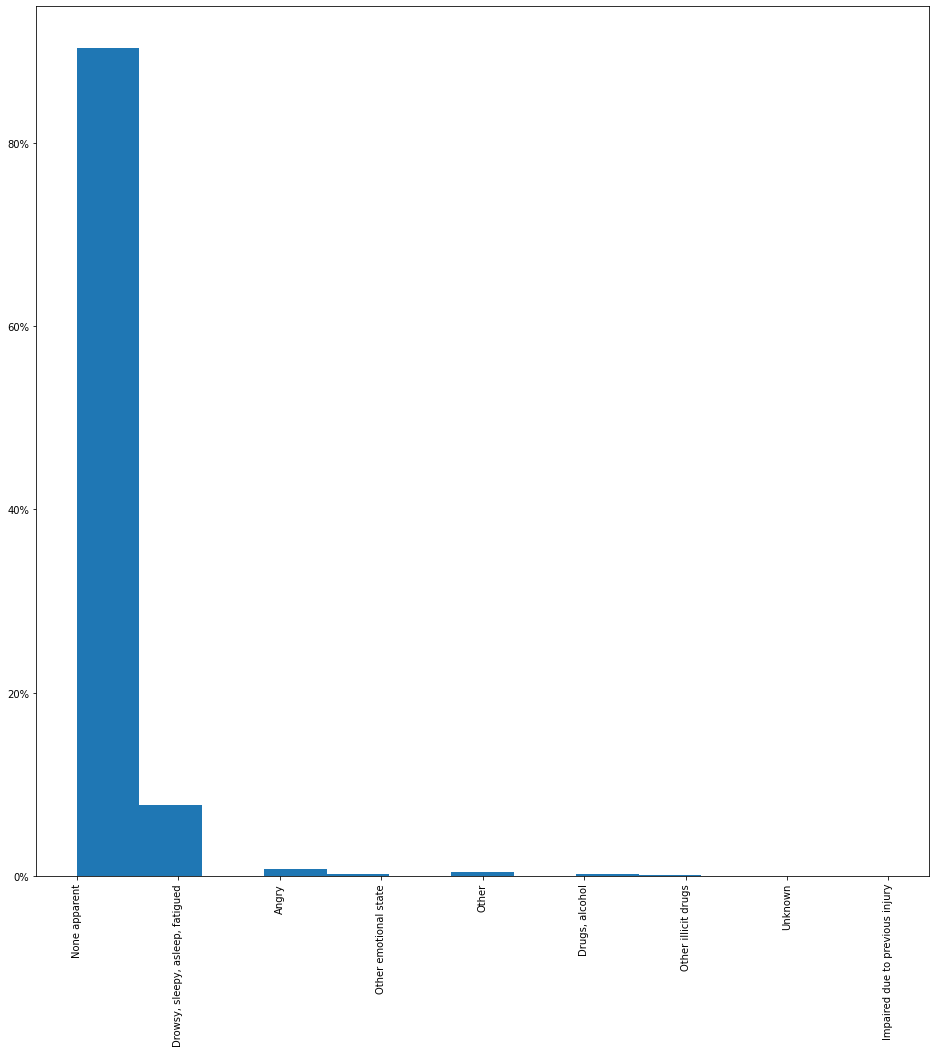

In [41]:
fig, ax = plt.subplots(figsize=[16,16])
ax.hist(driver_impairment, bins=len(impairment_dict))
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(driver_impairment)))

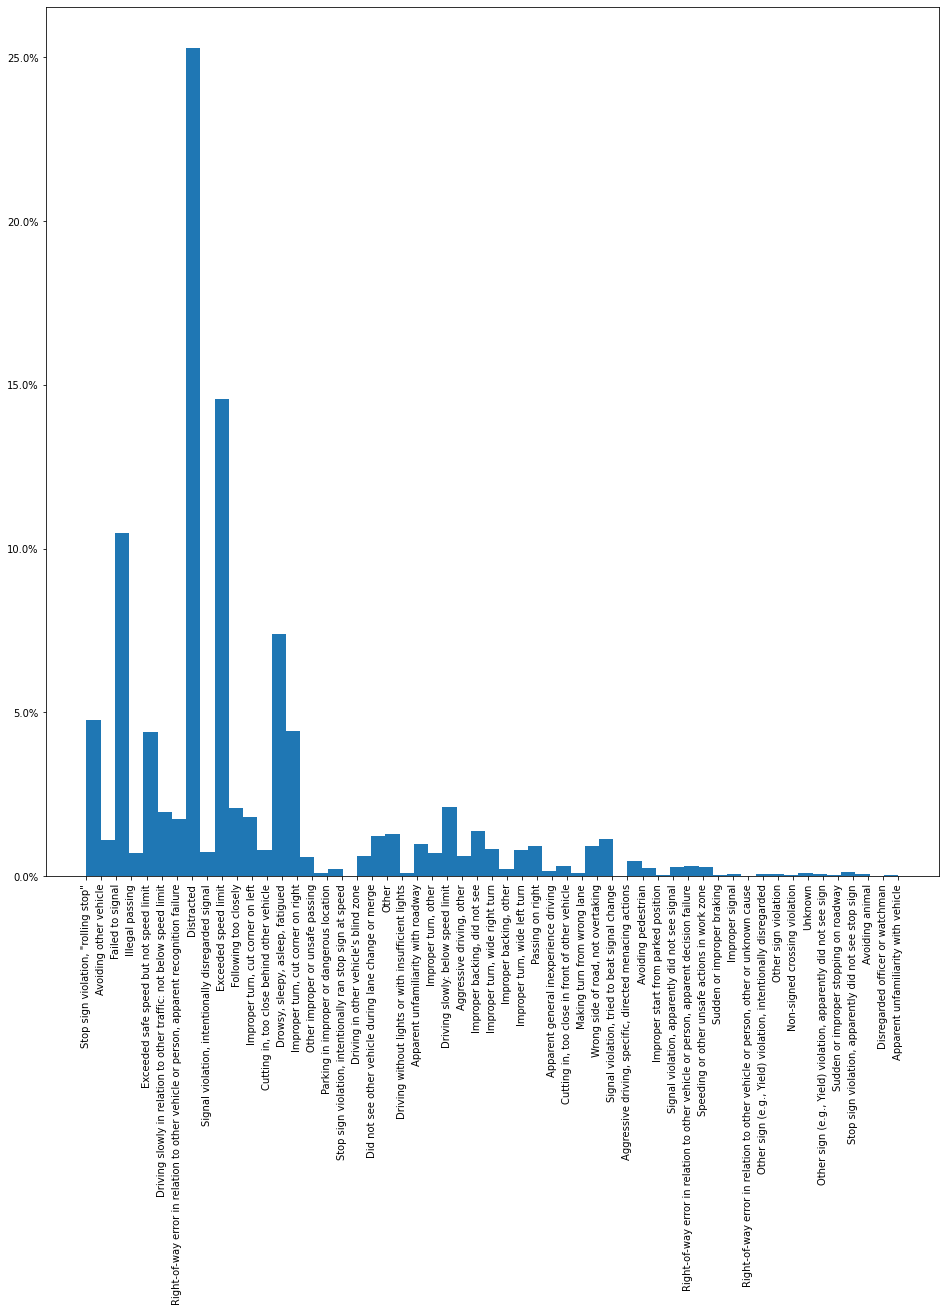

In [42]:
fig, ax = plt.subplots(figsize=[16,16])
ax.hist(driver_behavior, bins=len(BEHAVIOR_PROB_DICT))
plt.xticks(rotation='vertical')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(driver_behavior)))